# Data Analysis Project

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib_venn import venn2
import pydst # Danmarks Statistik
from datetime import datetime

In [5]:
Dst = pydst.Dst(lang='en') # Set language to English

In [6]:
Dst.get_subjects() # Get overview of Statistics Denmark's subjects

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


In [7]:
Dst.get_data(table_id = 'BB1S')

,POST,INDUDBOP,SÆSON,LAND,TID,INDHOLD
0,GOODS (FOB),Current receipts,Non-seasonally adjusted,REST OF THE WORLD,2005M01,34.8


In [8]:
Var = Dst.get_variables(table_id = 'BB1S')

In [9]:
Var[:]

,elimination,id,text,time,values
0,True,POST,items,False,"[{'id': '1.A.A', 'text': 'GOODS (FOB)'}, {'id'..."
1,False,INDUDBOP,receipts/expenditure,False,"[{'id': 'K', 'text': 'Current receipts'}, {'id..."
2,False,SÆSON,seasonal adjustment,False,"[{'id': '1', 'text': 'Non-seasonally adjusted'..."
3,True,LAND,country,False,"[{'id': 'W1', 'text': 'REST OF THE WORLD'}, {'..."
4,False,Tid,time,True,"[{'id': '2005M01', 'text': '2005M01'}, {'id': ..."


In [10]:
Var['values'][3][:10]

[{'id': 'W1', 'text': 'REST OF THE WORLD'},
 {'id': 'B5', 'text': 'EU-28'},
 {'id': 'D5', 'text': 'Extra EU-28'}]

In [11]:
df= Dst.get_data(table_id = 'BB1S', variables={'TID':['*'], 
                                               'SÆSON':['2'], 'LAND':['W1'], 'POST':['*'], 'INDUDBOP':['N']})

In [12]:
df.sort_values(['TID'], inplace=True)

In [13]:
df.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
174,2005M01,Seasonally adjusted,REST OF THE WORLD,PRIMARY INCOME,Net receipts,0.6
173,2005M01,Seasonally adjusted,REST OF THE WORLD,SERVICES,Net receipts,2.1
175,2005M01,Seasonally adjusted,REST OF THE WORLD,SECONDARY INCOME,Net receipts,-2.2
172,2005M01,Seasonally adjusted,REST OF THE WORLD,GOODS (FOB),Net receipts,5.8
171,2005M01,Seasonally adjusted,REST OF THE WORLD,CURRENT ACCOUNT,Net receipts,6.3


In [14]:
df['TID'] = df['TID'].str.replace('M', '-')

In [15]:
df['TID'] = pd.to_datetime(df['TID'])

In [16]:
PI  = df.loc[df['POST'] == 'PRIMARY INCOME', :]
S   = df.loc[df['POST'] == 'SERVICES', :]
SI  = df.loc[df['POST'] == 'SECONDARY INCOME', :]
G   = df.loc[df['POST'] == 'GOODS (FOB)', :]
CA  = df.loc[df['POST'] == 'CURRENT ACCOUNT', :]

In [18]:
PI['TID'].head()

174   2005-01-01
179   2005-02-01
184   2005-03-01
189   2005-04-01
194   2005-05-01
Name: TID, dtype: datetime64[ns]

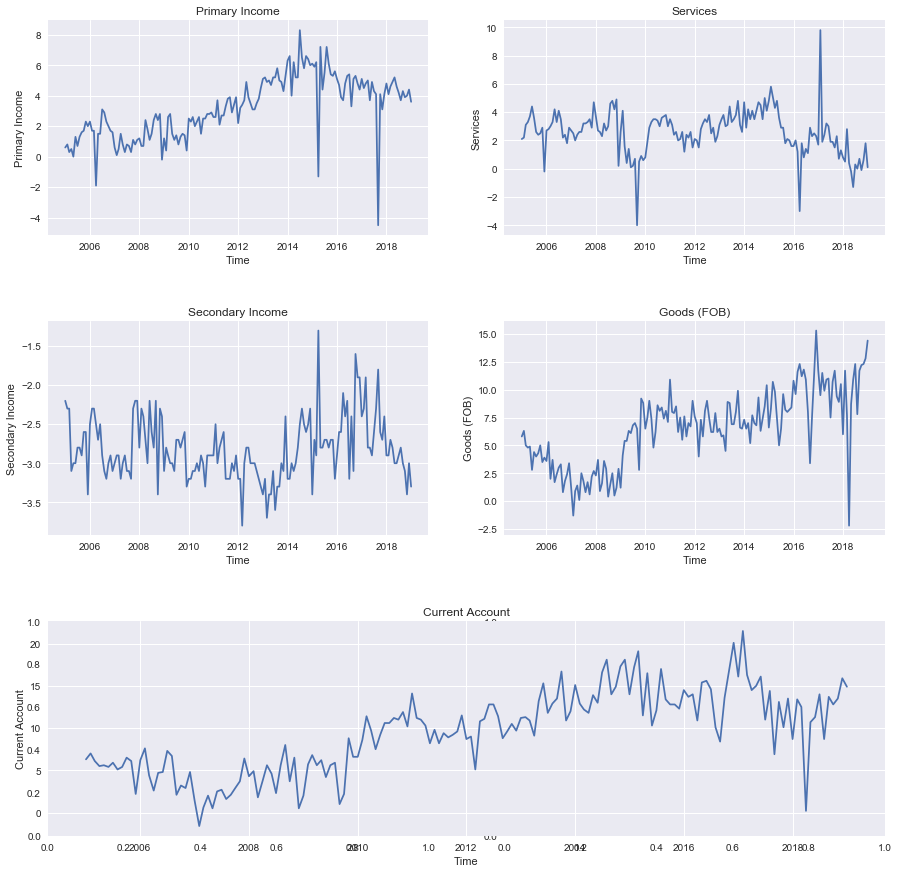

In [164]:
# plt.style.use('seaborn')
from matplotlib.gridspec import GridSpec

fig, axs = plt.subplots(3,2,figsize=(15,15))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)


# gs1 = GridSpec(3, 2)
# ax1 = plt.subplot(gs1[0, 0])
# ax2 = plt.subplot(gs1[0, 1])
# ax3 = plt.subplot(gs1[1, 0])
# 

plt.subplot(3, 2, 1)
plt.plot(PI['TID'],PI['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Primary Income')
plt.title('Primary Income')

plt.subplot(3, 2, 2)
plt.plot(S['TID'],S['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Services')
plt.title('Services')

plt.subplot(3, 2, 3)
plt.plot(SI['TID'],SI['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Secondary Income')
plt.title('Secondary Income')

plt.subplot(3, 2, 4)
plt.plot(G['TID'],G['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Goods (FOB)')
plt.title('Goods (FOB)')



ax = fig.add_subplot(gs[2, :])
gs = gridspec.GridSpec(3, 2)

#plt.subplot(3, 2, 5)
ax.plot(CA['TID'],CA['INDHOLD'])
plt.xlabel('Time')
plt.ylabel('Current Account')
plt.title('Current Account')


plt.savefig('Historical plot', bbox_inches='tight')

Text(0.5, 1.0, 'Current Account 1-lag-diff')

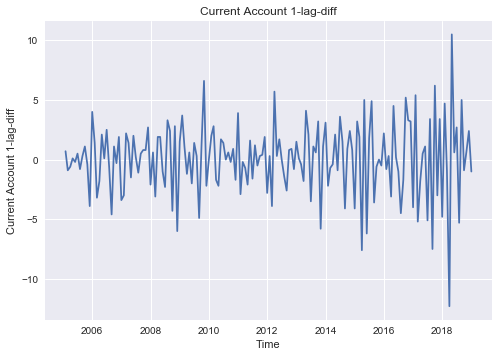

In [116]:
plt.subplot(1, 1, 1)
plt.plot(CA['TID'].iloc[1:],CA['INDHOLD'].diff().iloc[1:])
plt.xlabel('Time')
plt.ylabel('Current Account 1-lag-diff')
plt.title('Current Account 1-lag-diff')